In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_train.csv')

In [3]:
df.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4


In [4]:
df.isnull().sum()

date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

In [5]:
df.drop_duplicates()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-05-15,312000.0,2,2,True,138.42547,False,False,False,2,True,False,5,1
1,2014-11-14,310000.0,2,2,False,105.90942,False,False,False,1,True,False,11,3
2,2014-12-24,320000.0,2,2,False,117.98681,False,True,False,1,False,True,12,2
3,2015-02-22,264500.0,2,3,False,151.43189,False,False,False,2,True,True,2,1
4,2015-01-06,700000.0,3,2,True,341.88304,False,False,False,3,False,False,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13598,2014-10-07,353950.0,3,3,False,302.86378,False,False,False,2,True,False,10,1
13599,2014-08-08,289950.0,2,2,False,155.14801,False,False,False,2,True,False,8,2
13600,2014-07-17,625504.0,2,3,True,117.98681,False,False,False,2,True,False,7,4
13601,2014-11-26,730000.0,3,5,False,340.02498,False,False,False,2,True,False,11,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13603 entries, 0 to 13602
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               13603 non-null  object 
 1   price              13603 non-null  float64
 2   bedrooms           13603 non-null  int64  
 3   grade              13603 non-null  int64  
 4   has_basement       13603 non-null  bool   
 5   living_in_m2       13603 non-null  float64
 6   renovated          13603 non-null  bool   
 7   nice_view          13603 non-null  bool   
 8   perfect_condition  13603 non-null  bool   
 9   real_bathrooms     13603 non-null  int64  
 10  has_lavatory       13603 non-null  bool   
 11  single_floor       13603 non-null  bool   
 12  month              13603 non-null  int64  
 13  quartile_zone      13603 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 930.0+ KB


In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
       'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
       'has_lavatory', 'single_floor', 'month', 'quartile_zone'],
      dtype='object')

In [8]:
df.drop('date',inplace=True,axis=1)

In [9]:
df_numeric=df.select_dtypes(include='number').columns

In [10]:
df_numeric

Index(['price', 'bedrooms', 'grade', 'living_in_m2', 'real_bathrooms', 'month',
       'quartile_zone'],
      dtype='object')

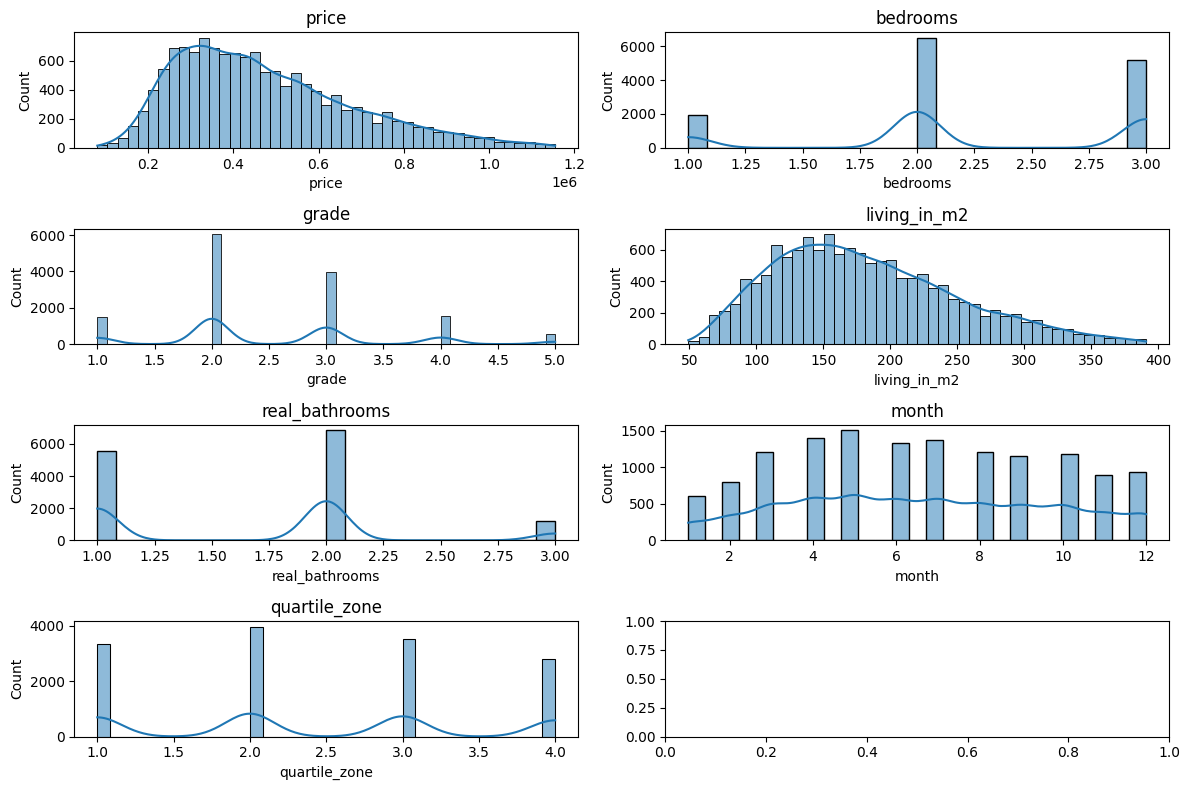

In [109]:
fig, axs = plt.subplots(nrows=4,ncols=2,figsize=(12,8))
for i,j in enumerate(df_numeric):
    col,row = divmod(i,2)
    sns.histplot(df[j],kde=True,ax=axs[col,row])
    axs[col,row].set_title(j)
plt.tight_layout()
plt.show()

<Axes: ylabel='living_in_m2'>

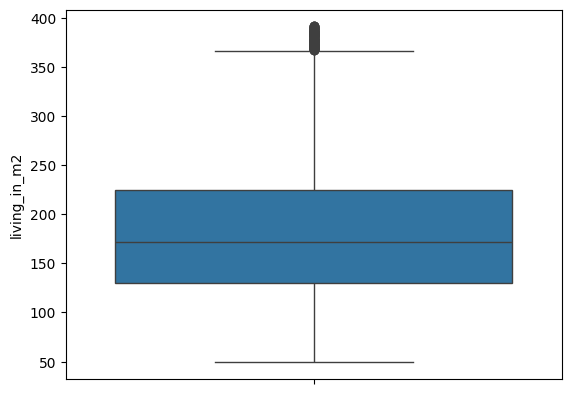

In [110]:
sns.boxplot(df['living_in_m2'])

<Axes: ylabel='living_in_m2'>

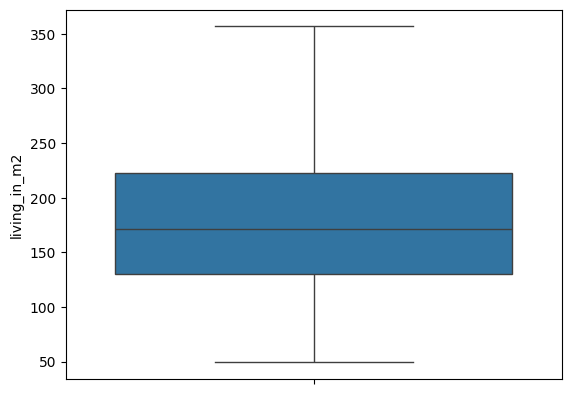

In [11]:
Q1 = df['living_in_m2'].quantile(0.25)
Q3 = df['living_in_m2'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.4 * IQR
lower_bound = Q1 -1.4 * IQR
df = df.loc[(df['living_in_m2']>lower_bound) & (df['living_in_m2']<upper_bound)]
sns.boxplot(df['living_in_m2'])

In [12]:
df.shape

(13440, 13)

In [13]:
df = df.drop(columns=['single_floor','month'])

<Axes: >

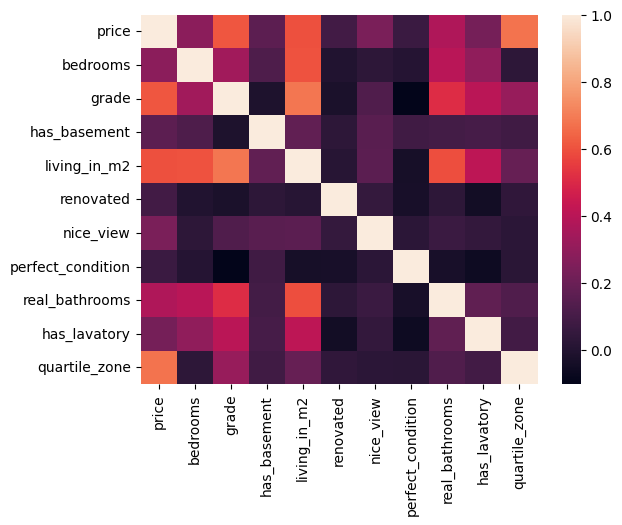

In [114]:
sns.heatmap(df.corr())

In [14]:
df_no_scale = df.copy()
df_mm = df.copy()
df_ss = df.copy()
df_rob = df.copy()

In [15]:
x_rob = df.drop(columns='price')
y_rob = df['price']

In [119]:
x_no_scale = df.drop(columns='price')
y_no_scale = df['price']
x_mm = df_mm.drop(columns='price')
y_mm = df_mm['price']
x_ss = df_ss.drop(columns='price')
y_ss = df_ss['price']

In [120]:
x_no_scale.select_dtypes(include='number').columns

Index(['bedrooms', 'grade', 'living_in_m2', 'real_bathrooms', 'quartile_zone'], dtype='object')

In [16]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score

In [125]:
mm = MinMaxScaler()
x_mm[['living_in_m2']] = mm.fit_transform(x_mm[['living_in_m2']])

In [129]:
x_mm['living_in_m2'].describe()

count    13440.000000
mean         0.423376
std          0.211251
min          0.000000
25%          0.262840
50%          0.395770
75%          0.563671
max          1.000000
Name: living_in_m2, dtype: float64

In [131]:
std = StandardScaler()
x_ss[['living_in_m2']] = std.fit_transform(x_ss[['living_in_m2']])

In [132]:
x_ss['living_in_m2'].describe()

count    1.344000e+04
mean     1.237106e-16
std      1.000037e+00
min     -2.004218e+00
25%     -7.599624e-01
50%     -1.306837e-01
75%      6.641383e-01
max      2.729674e+00
Name: living_in_m2, dtype: float64

In [17]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_rob[['living_in_m2']] = rs.fit_transform(x_rob[['living_in_m2']])

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

In [19]:
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0)
}

# Robust

In [20]:
hasil4={}
for i,j in models.items():
    cv_rob = cross_val_score(j,X=x_rob,y=y_rob,cv=25,scoring='neg_mean_squared_error')
    # print(f"{i} = {cv_rob}")
    hasil4[i] = cv_rob
hasil_rob = pd.DataFrame(hasil4)
abs(hasil_rob).to_excel('data_2_hasil_rob.xlsx',index=False)

# No Scale

In [136]:
# cv_no_scale = cross_val_score(linreg,X=x_no_scale,y=y_no_scale,cv=25,scoring=['neg_mean_squared_error'])
models = {
    "Regresi": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "SVM": SVR(),
    "RF": RandomForestRegressor(),
    "Cat": CatBoostRegressor(verbose=0)
}
hasil1={}
for i,j in models.items():
    cv_no_scale = cross_val_score(j,X=x_no_scale,y=y_no_scale,cv=25,scoring='neg_mean_squared_error')
    print(f"{i} = {cv_no_scale}")
    hasil1[i] = cv_no_scale
hasil_no_scale = pd.DataFrame(hasil1)

Regresi = [-1.08077777e+10 -1.07366083e+10 -1.01007028e+10 -1.16695397e+10
 -1.09074172e+10 -1.06848189e+10 -1.01305640e+10 -1.07522391e+10
 -1.17100598e+10 -1.08774049e+10 -1.10128402e+10 -8.68295868e+09
 -1.13002761e+10 -1.13412931e+10 -1.06155361e+10 -1.02883903e+10
 -1.21526952e+10 -1.05870074e+10 -1.38526171e+10 -1.04893654e+10
 -1.07574207e+10 -1.19062876e+10 -1.01177157e+10 -1.03600738e+10
 -9.92643792e+09]
KNN = [-1.49432267e+10 -1.34186107e+10 -1.19122666e+10 -1.33267052e+10
 -1.29952419e+10 -1.16128711e+10 -1.15584655e+10 -1.42067321e+10
 -1.49521888e+10 -1.25785339e+10 -1.22540922e+10 -1.20387398e+10
 -1.42323606e+10 -1.40156466e+10 -1.27785556e+10 -1.27391368e+10
 -1.50241548e+10 -1.33708469e+10 -1.75885299e+10 -1.38821816e+10
 -1.23306654e+10 -1.35458788e+10 -1.25615557e+10 -1.31527794e+10
 -1.19778535e+10]
SVM = [-4.67425457e+10 -4.61062247e+10 -3.79435099e+10 -4.55152420e+10
 -4.26862073e+10 -4.35608271e+10 -4.10837844e+10 -4.59671600e+10
 -4.65004591e+10 -3.73985302e+10

In [137]:
abs(hasil_no_scale).to_csv('data_2_hasil_no_scale.csv',index=False)

# MM

In [138]:
hasil2={}
for i,j in models.items():
    cv_mm = cross_val_score(j,X=x_mm,y=y_mm,cv=25,scoring='neg_mean_squared_error')
    print(f"{i} = {cv_mm}")
    hasil2[i] = cv_mm
hasil_mm = pd.DataFrame(hasil2)

Regresi = [-1.08077777e+10 -1.07366083e+10 -1.01007028e+10 -1.16695397e+10
 -1.09074172e+10 -1.06848189e+10 -1.01305640e+10 -1.07522391e+10
 -1.17100598e+10 -1.08774049e+10 -1.10128402e+10 -8.68295868e+09
 -1.13002761e+10 -1.13412931e+10 -1.06155361e+10 -1.02883903e+10
 -1.21526952e+10 -1.05870074e+10 -1.38526171e+10 -1.04893654e+10
 -1.07574207e+10 -1.19062876e+10 -1.01177157e+10 -1.03600738e+10
 -9.92643792e+09]
KNN = [-1.20545627e+10 -1.22890789e+10 -1.08673452e+10 -1.24445220e+10
 -1.15723997e+10 -1.06571761e+10 -1.15176621e+10 -1.30339791e+10
 -1.27668904e+10 -1.15223778e+10 -1.24226626e+10 -9.54785319e+09
 -1.30571336e+10 -1.17496684e+10 -1.20409939e+10 -1.23111931e+10
 -1.26448771e+10 -1.21990042e+10 -1.48413118e+10 -1.18660650e+10
 -1.25184986e+10 -1.27670428e+10 -1.12685758e+10 -1.11681441e+10
 -1.14641652e+10]
SVM = [-4.66322142e+10 -4.59891435e+10 -3.78298212e+10 -4.53740839e+10
 -4.25603838e+10 -4.34185468e+10 -4.09652941e+10 -4.58864899e+10
 -4.63931762e+10 -3.72753245e+10

In [139]:
abs(hasil_mm).to_csv('data_2_hasil_Minmax.csv',index=False)

# SS

In [140]:
hasil3={}
for i,j in models.items():
    cv_ss = cross_val_score(j,X=x_ss,y=y_ss,cv=25,scoring='neg_mean_squared_error')
    print(f"{i} = {cv_ss}")
    hasil3[i] = cv_ss
hasil_ss = pd.DataFrame(hasil3)
abs(hasil_ss).to_csv('data_2_hasil_Std.csv',index=False)

Regresi = [-1.08077777e+10 -1.07366083e+10 -1.01007028e+10 -1.16695397e+10
 -1.09074172e+10 -1.06848189e+10 -1.01305640e+10 -1.07522391e+10
 -1.17100598e+10 -1.08774049e+10 -1.10128402e+10 -8.68295868e+09
 -1.13002761e+10 -1.13412931e+10 -1.06155361e+10 -1.02883903e+10
 -1.21526952e+10 -1.05870074e+10 -1.38526171e+10 -1.04893654e+10
 -1.07574207e+10 -1.19062876e+10 -1.01177157e+10 -1.03600738e+10
 -9.92643792e+09]
KNN = [-1.24591882e+10 -1.15436811e+10 -1.04155009e+10 -1.23692698e+10
 -1.15639577e+10 -1.00891284e+10 -1.11893863e+10 -1.29114035e+10
 -1.25949996e+10 -1.13000170e+10 -1.24943742e+10 -9.74832935e+09
 -1.30430366e+10 -1.11509695e+10 -1.18081913e+10 -1.16566495e+10
 -1.25957189e+10 -1.21751436e+10 -1.45932818e+10 -1.18308727e+10
 -1.24249220e+10 -1.24761930e+10 -1.13876046e+10 -1.08086545e+10
 -1.18505087e+10]
SVM = [-4.66046440e+10 -4.59539102e+10 -3.78134178e+10 -4.53602583e+10
 -4.25405581e+10 -4.34047330e+10 -4.09487903e+10 -4.58532770e+10
 -4.63635863e+10 -3.72631473e+10